# Normalization for numerical features
> An example of preprocessing, namely scaling numerical variables

- toc: true
- badges: false
- comments: true
- author: Cécile Gallioz
- categories: [sklearn]

# Preparation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
myDataFrame = pd.read_csv("../../scikit-learn-mooc/datasets/penguins_classification.csv")

## The set

In [3]:
target_column = 'Species'
target = myDataFrame[target_column]
target.value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: Species, dtype: int64

In [4]:
target.value_counts(normalize=True)

Adelie       0.441520
Gentoo       0.359649
Chinstrap    0.198830
Name: Species, dtype: float64

## Continuation of preparation

In [5]:
data = myDataFrame.drop(columns=target_column)
data.columns

Index(['Culmen Length (mm)', 'Culmen Depth (mm)'], dtype='object')

In [6]:
numerical_columns = ['Culmen Length (mm)', 'Culmen Depth (mm)']
data_numeric = data[numerical_columns]

In [7]:
data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, 
    target, 
    #random_state=42, 
    test_size=0.25)

In [8]:
data_train.describe()

,Culmen Length (mm),Culmen Depth (mm)
count,256.000000,256.000000
mean,43.830469,17.151953
std,5.461854,1.917841
min,32.100000,13.100000
25%,39.200000,15.675000
50%,43.700000,17.300000
75%,48.500000,18.600000
max,59.600000,21.500000


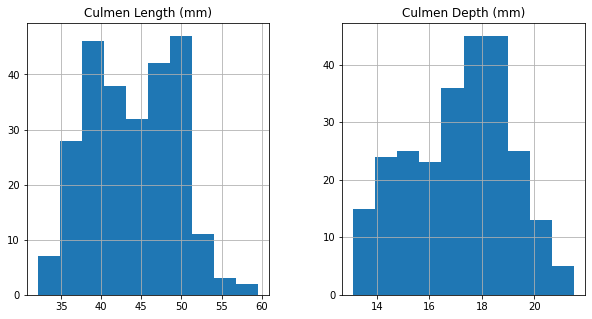

In [9]:
_ = data_train.hist(figsize=(10, 5))

# Normalization

In [10]:
scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled = pd.DataFrame(data_train_scaled,
                                 columns=data_train.columns)
data_train_scaled.describe()

,Culmen Length (mm),Culmen Depth (mm)
count,2.560000e+02,2.560000e+02
mean,-2.151057e-16,7.910339e-16
std,1.001959e+00,1.001959e+00
min,-2.151915e+00,-2.116907e+00
25%,-8.494440e-01,-7.716210e-01
50%,-2.393405e-02,7.734577e-02
75%,8.566099e-01,7.565192e-01
max,2.892868e+00,2.271598e+00


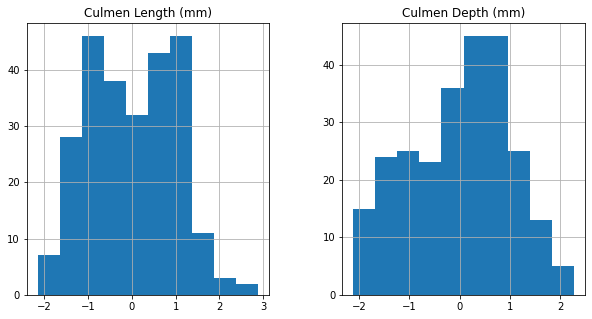

In [11]:
_ = data_train_scaled.hist(figsize=(10, 5))

# Conclusion

This transformer shifts and scales each feature individually so that they all have a 0-mean and a unit standard deviation.